In [ ]:
!pip install yfinance pandas numpy matplotlib seaborn ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=2ed4aa36a44c1e2c20e2000bd477596b9f3fc82a2afb759c8f7f569ec9c8309a
  Stored in directory: /root/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ta  # technical analysis library


In [ ]:
ticker = "AAPL"   # change to TSLA, MSFT, etc.
data = yf.download(ticker, start="2015-01-01", end="2025-01-01")
data.head()


/tmp/ipython-input-2762439661.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.237553,24.705322,23.798602,24.694237,212818400
2015-01-05,23.554741,24.086801,23.368521,24.006992,257142000
2015-01-06,23.556959,23.816338,23.195601,23.619033,263188400
2015-01-07,23.887274,23.987034,23.654497,23.765343,160423600
2015-01-08,24.805079,24.862719,24.097882,24.215380,237458000


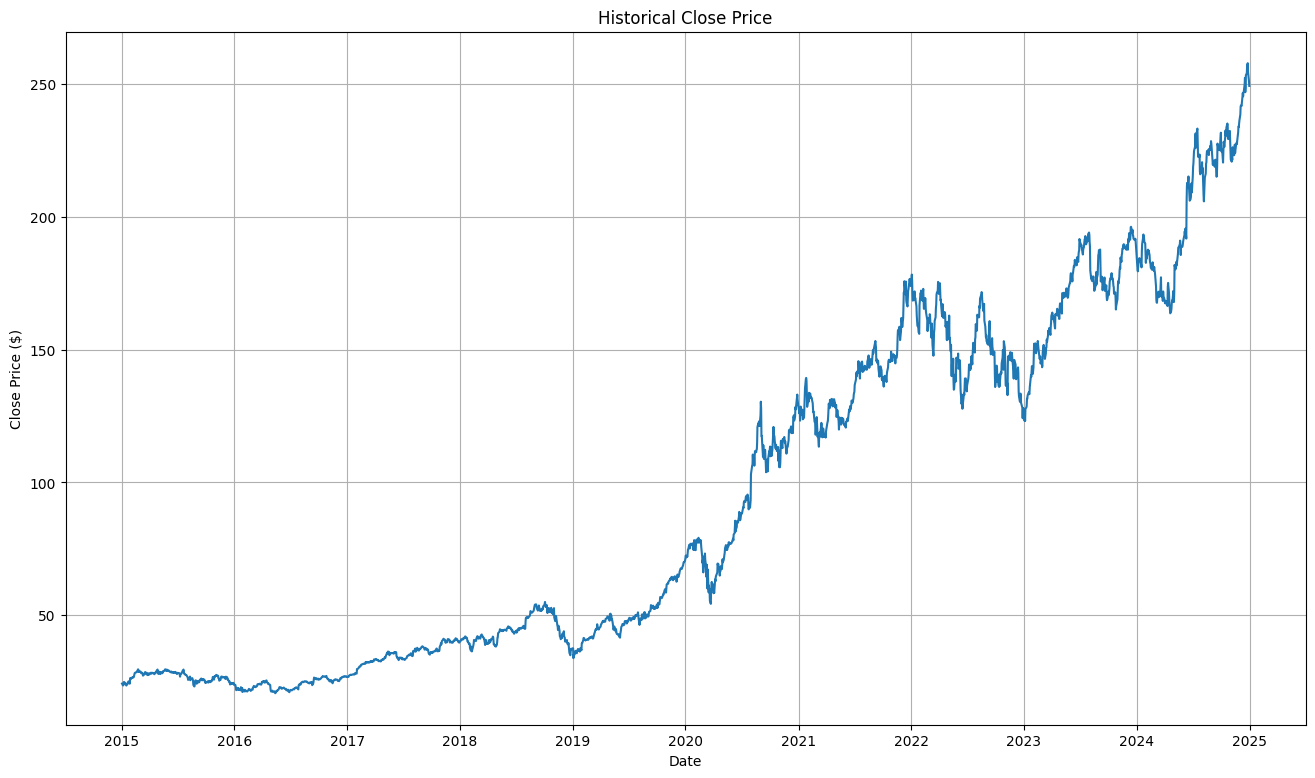

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(data['Close'])
plt.title("Historical Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.grid(True)
plt.show()


<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

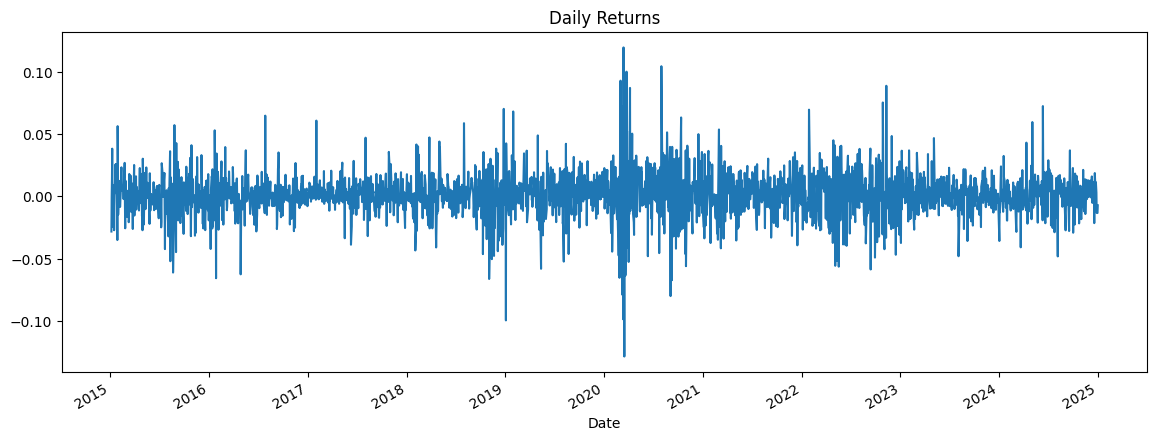

In [ ]:
data['Daily_Return'] = data['Close'].pct_change()
data['Daily_Return'].plot(figsize=(14,5), title="Daily Returns")


In [ ]:
data.isna().sum()
data = data.interpolate(method='linear')


In [ ]:
data.isna().sum()
data = data.interpolate(method='linear')


In [ ]:
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()


In [ ]:
macd = ta.trend.MACD(data['Close'])
data['MACD'] = macd.macd()
data['MACD_Signal'] = macd.macd_signal()


ValueError: Data must be 1-dimensional, got ndarray of shape (2516, 1) instead

In [ ]:
data['RSI'] = ta.momentum.RSIIndicator(data['Close'].squeeze()).rsi()

In [ ]:
macd = ta.trend.MACD(data['Close'].squeeze())
data['MACD'] = macd.macd()
data['MACD_Signal'] = macd.macd_signal()

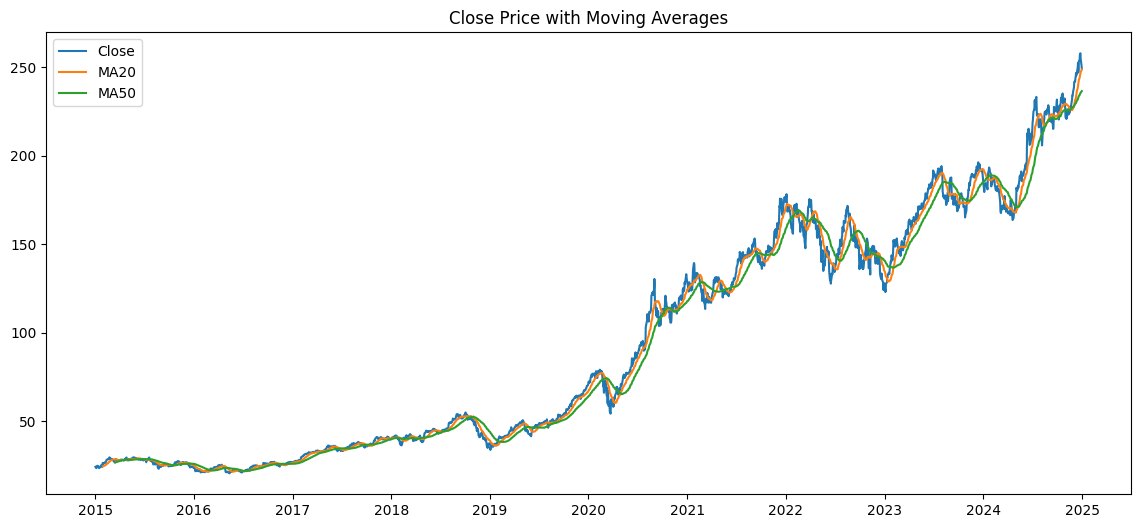

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(data['Close'], label='Close')
plt.plot(data['MA20'], label='MA20')
plt.plot(data['MA50'], label='MA50')
plt.legend()
plt.title("Close Price with Moving Averages")
plt.show()


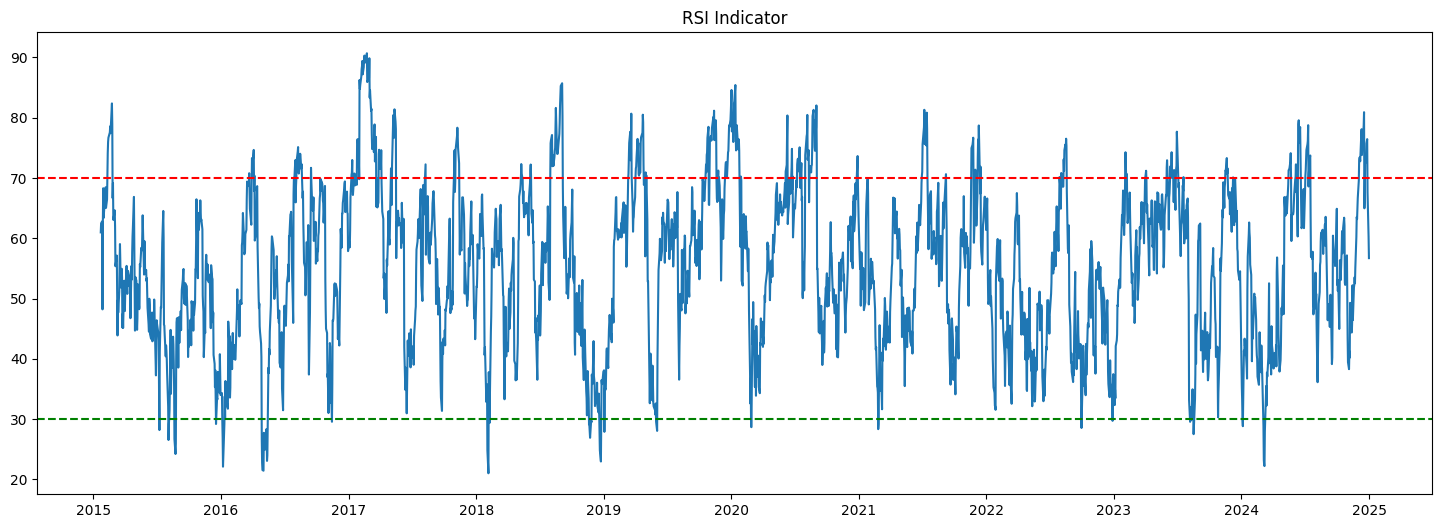

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(data['RSI'])
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title("RSI Indicator")
plt.show()


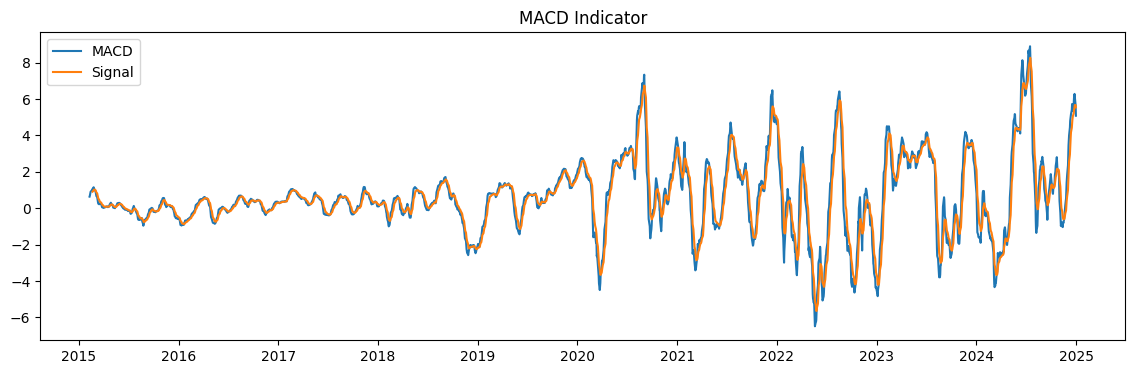

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(data['MACD'], label='MACD')
plt.plot(data['MACD_Signal'], label='Signal')
plt.title("MACD Indicator")
plt.legend()
plt.show()


<Axes: title={'center': '20-Day Rolling Volatility'}, xlabel='Date'>

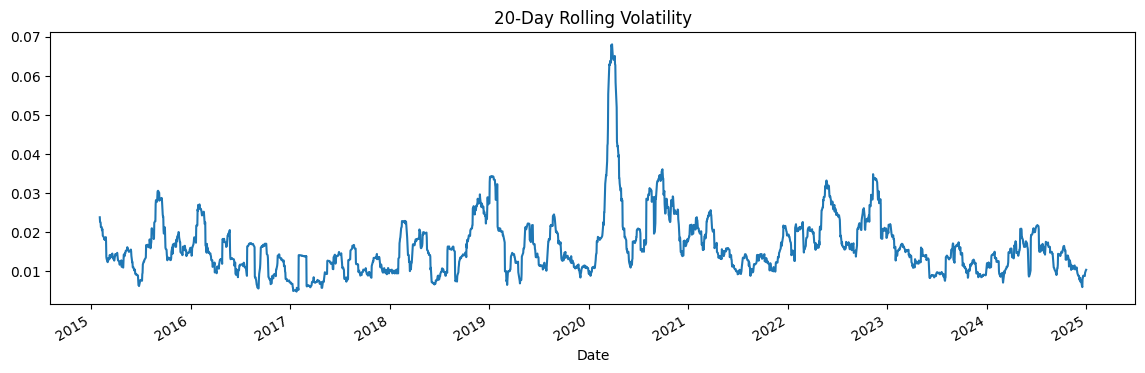

In [ ]:
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()
data['Volatility'].plot(figsize=(14,4), title='20-Day Rolling Volatility')
